# «Корреляция и корреляционный анализ»

#### Используются данные о характеристиках воды в британских городах (файл water.csv прилагается)

Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('01_water.csv')
data.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


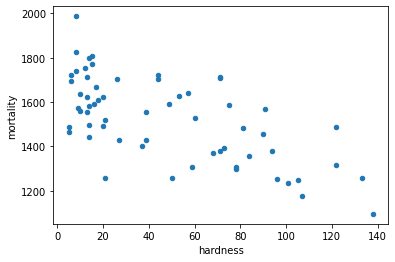

In [4]:
data.plot(kind='scatter', x='hardness', y='mortality')

Из графика можно сделать вывод о наличии линейной зависимости между жесткостью воды и смертностью, а также предварительный вывод о гомоскедастичности распределения остатков

In [5]:
# коэффициент корреляции Пирсона
data[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [6]:
# коэффициент корреляции Спирмена
data[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Оба метода расчета коэффициента корреляции показывают сильную отрицательную корреляцию

In [7]:
# Обучение модели линейной регрессии
X = data[['hardness']]
y = data['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
model.coef_

array([-2.97603607])

In [10]:
model.intercept_

1663.601828918207

In [11]:
# обученная модель имеет вид y = 1663.6 - 2.976*x

In [12]:
y_pred = model.predict(X_test)
y_pred

array([1610.03317972, 1633.84146825, 1485.03966494, 1547.53642233,
       1505.8719174 , 1645.74561252, 1639.79354039, 1300.52542883,
       1392.78254688, 1586.22489119, 1422.54290755, 1636.81750432,
       1618.96128792, 1547.53642233, 1363.02218622, 1514.8000256 ,
       1377.90236655, 1461.23137641, 1431.47101574])

In [13]:
# расчет коэффициента детерминации:
model.score(X_test, y_test)

0.5577032712365182

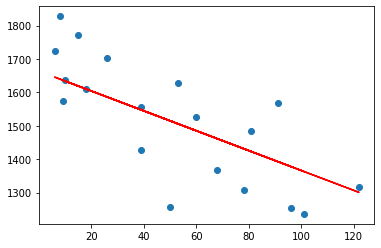

In [14]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [15]:
# значение коэффициента детерминации более 0.5 свидетельствует об удовлетворительном качестве модели

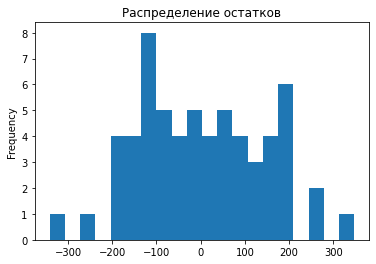

In [16]:
# построение гистограммы остатков
data['resid'] = data['mortality'] - (1663.6 - 2.976*data['hardness'])
data['resid'].plot(kind='hist', 
                     title='Распределение остатков', bins=20)

In [17]:
# распределение остатков имеет не нормальный характер

Задание 2.

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [18]:
# Деление датафрейма на 2 части
data_s = data[data['location'] == 'South']
data_n = data[data['location'] == 'North']

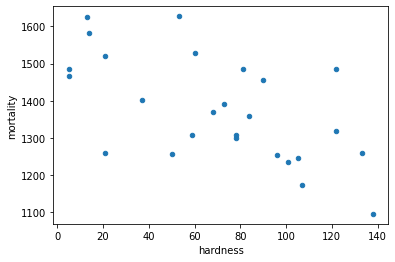

In [19]:
# Выполнение расчетов из задания 1 - для ЮЖНЫХ городов
data_s.plot(kind='scatter', x='hardness', y='mortality')

In [20]:
data_s[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [21]:
data_s[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [22]:
X = data_s[['hardness']]
y = data_s['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
model.coef_

array([-1.88887324])

In [24]:
model.intercept_

1490.4186621496294

In [25]:
# обученная модель для южных городов имеет вид y = 1490.419 - 1.889*x
# зависимость менее выражена, чем на общем массиве данных

In [26]:
y_pred = model.predict(X_test)
y_pred

array([1299.64246471, 1465.86331   , 1352.53091548, 1331.75330982,
       1320.42007037, 1480.97429594, 1239.19852097, 1377.08626763])

In [27]:
model.score(X_test, y_test)

0.40864442581943883

In [28]:
# значение коэффициента детерминации для южных городов менее 0.5 может свидительствовать о недостаточном качестве модели

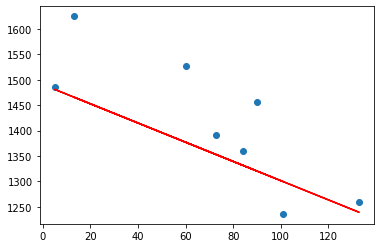

In [29]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

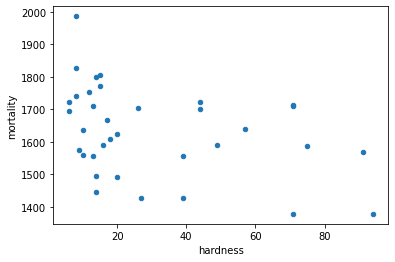

In [30]:
# Выполнение расчетов из задания 1 - для СЕВЕРНЫХ городов
data_n.plot(kind='scatter', x='hardness', y='mortality')

In [31]:
data_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [32]:
data_n[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [33]:
X = data_n[['hardness']]
y = data_n['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=23)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
model.coef_

array([-2.80766259])

In [35]:
model.intercept_

1718.9078156312626

In [36]:
# обученная модель для южных городов имеет вид y = 1718.908 - 2.808*x

In [37]:
y_pred = model.predict(X_test)
y_pred

array([1676.79287674, 1679.60053934, 1643.10092563, 1463.41051971,
       1673.98521415, 1519.56377156, 1676.79287674, 1609.40897452,
       1508.33312119, 1679.60053934, 1690.83118971])

In [38]:
model.score(X_test, y_test)

-0.25019459258608356

Отрицательный коэффициент детерминации говорит о неудовлетворительном качестве модели для северных городов

Вероятные причины - выбросы, негомоскедастичность и ненормальность распределения остатков

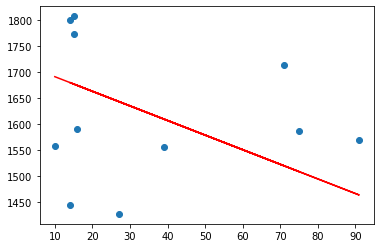

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

<ipython-input-40-1195607848f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_n['resid'] = data_n['mortality'] - (1718.908 - 2.808*data['hardness'])


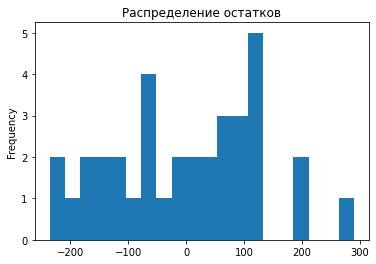

In [40]:
# проверка нормальности распределения остатков
data_n['resid'] = data_n['mortality'] - (1718.908 - 2.808*data['hardness'])
data_n['resid'].plot(kind='hist', 
                     title='Распределение остатков', bins=20)

In [41]:
# предположение о ненормальности распределения остатков подтверждено

**ВЫВОД:**

при разделении датасета остается слишком мало данных для построения адекватной модели, это видно по коэффициентам детерминации (невозможно с уверенностью судить о наличии/отсутствии взаимосвязи).